# Analiza Zbioru Danych: House Prices - Konrad Tupta

## 1. Wprowadzenie

Niniejsza analiza wykorzystuje zbiór danych dotyczących cen domów. Celem analizy jest przeprowadzenie pełnej analizy zbioru danych, budowa modeli predykcyjnych oraz optymalizacja tych modeli. W poniższych sekcjach zostaną szczegółowo opisane poszczególne etapy analizy.

## 2. Importowanie Bibliotek i Danych

W tej sekcji importuje wszystkie wymagane bibliteki i narzędzia, które wykorzystam w swojej analizie

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## 3. Wczytanie i eksploracja danych

Najpierw wczytamy dane oraz przeprowadzimy wstępną eksplorację, aby zrozumieć ich strukturę oraz zawartość.

In [5]:
# Wczytanie danych
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Wyświetlenie podstawowych informacji o zbiorze danych
data.info()

# Wyświetlenie pierwszych kilku wierszy
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
# Wyświetlenie ostatnich kilku wierszy
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [7]:
# Opis statystyczny danych
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


#### Opis Cech w Zbiorze Danych

Poniżej przedstawiono szczegółowy opis poszczególnych kolumn w zbiorze danych dotyczących cen nieruchomości:

* **date**: Data transakcji. Informuje o dniu, miesiącu i roku, w którym dokonano zakupu nieruchomości.
* **price**: Cena nieruchomości. Jest to wartość docelowa, którą będziemy przewidywać w modelach.
* **bedrooms**: Liczba sypialni. Informuje, ile sypialni znajduje się w danym domu.
* **bathrooms**: Liczba łazienek. Może zawierać wartości dziesiętne, co oznacza, że niektóre łazienki mogą być częściowe
* **sqft_living**: Powierzchnia mieszkalna (w stopach kwadratowych). Jest to całkowita powierzchnia użytkowa domu.
* **sqft_lot**: Powierzchnia działki (w stopach kwadratowych). Informuje o wielkości działki, na której znajduje się nieruchomość.
* **floors**: Liczba pięter. Określa, ile pięter ma dom.
* **waterfront**: Czy nieruchomość ma dostęp do wody. Jest to zmienna binarna, gdzie 1 oznacza, że dom znajduje się nad wodą, a 0, że nie.
* **view**: Ocena widoku z nieruchomości. Jest to zmienna kategoryczna, która ocenia jakość widoku (np. 0 - brak widoku, 1 - widok średni, 2 - dobry widok, itd.).
* **condition**: Stan nieruchomości. Ocena ogólnego stanu domu (np. 1 - bardzo zły, 2 - zły, 3 - średni, 4 - dobry, 5 - bardzo dobry).
* **sqft_above**: Powierzchnia mieszkalna powyżej poziomu gruntu (w stopach kwadratowych). Jest to powierzchnia użytkowa nie obejmująca piwnicy.
* **sqft_basement**: Powierzchnia piwnicy (w stopach kwadratowych). Określa wielkość piwnicy w domu.
* **yr_built**: Rok budowy. Informuje, w którym roku dom został wybudowany.
* **yr_renovated**: Rok renowacji. Jeżeli dom był odnawiany, ta zmienna wskazuje rok ostatniej renowacji, w przeciwnym razie wartość wynosi 0.
* **street**: Ulica. Adres ulicy, na której znajduje się nieruchomość.
* **city**: Miasto. Nazwa miasta, w którym znajduje się nieruchomość.
* **statezip**: Kod pocztowy. Zawiera zarówno stan (w formie skróconej), jak i kod pocztowy.
* **country**: Kraj. Nazwa kraju, w którym znajduje się nieruchomość (najczęściej 'USA').

Te cechy zostaną użyte do budowy modeli predykcyjnych, aby przewidzieć ceny nieruchomości na podstawie dostępnych danych.

## 4. Czyszczenie danych

Sprawdzenie, czy w zbiorze danych występują brakujące wartości.

In [8]:
# Sprawdzenie brakujących wartości
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [9]:
# Usunięcie wszystkich wierszy zawierających brakujące wartości
data.dropna(inplace=True)

In [10]:
# Wyświetlenie kształtu (wymiarów) DataFrame po usunięciu brakujących wartości
data.shape

(4600, 18)

## 5. Usunięcie wartości odstających

In [11]:
# Usunięcie wartości odstających
# Dodanie kolumn ze z-score dla wybranych zmiennych
# Z-score to miara, która opisuje odległość wartości od średniej w jednostkach odchylenia standardowego
data['price_zscore'] = zscore(data['price'])
data['sqft_living_zscre'] = zscore(data['sqft_living'])
data['sqft_lot_zscre'] = zscore(data['sqft_lot'])
data['sqft_above_zscre'] = zscore(data['sqft_above'])
data['sqft_basement_zscre'] = zscore(data['sqft_basement'])

# Usunięcie wartości odstających (z-score < -3 lub > 3) dla każdej z kolumn
data = data[(data.price_zscore < 3) & (data.price_zscore > -3)]
data = data[(data.sqft_living_zscre < 3) & (data.sqft_living_zscre > -3)]
data = data[(data.sqft_lot_zscre < 3) & (data.sqft_lot_zscre > -3)]
data = data[(data.sqft_above_zscre < 3) & (data.sqft_above_zscre > -3)]
data = data[(data.sqft_basement_zscre < 3) & (data.sqft_basement_zscre > -3)]

In [12]:
# Usunięcie kolumn ze z-score, ponieważ nie są już potrzebne
data.drop(columns=['price_zscore','sqft_living_zscre','sqft_lot_zscre','sqft_above_zscre','sqft_basement_zscre'], inplace=True)

In [13]:
# Wyświetlenie kształtu (wymiarów) DataFrame po usunięciu wartości odstających
data.shape

(4412, 18)

In [14]:
# Wyświetlenie podstawowych statystyk opisowych dla DataFrame po usunięciu wartości odstających
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.412000e+03,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,5.148384e+05,3.370580,2.115764,2050.750907,10721.808250,1.504873,0.004986,0.205122,3.455802,1759.768132,290.982774,1970.312103,813.176791
std,2.883499e+05,0.889382,0.726956,804.787880,12730.880029,0.538823,0.070446,0.713151,0.677785,756.913651,419.827579,29.810081,980.236717
min,0.000000e+00,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.199500e+05,3.000000,1.750000,1440.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1180.000000,0.000000,1950.000000,0.000000
50%,4.530000e+05,3.000000,2.250000,1940.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,1974.000000,0.000000
75%,6.353250e+05,4.000000,2.500000,2550.000000,10404.500000,2.000000,0.000000,0.000000,4.000000,2230.000000,600.000000,1996.000000,1999.000000
max,2.199900e+06,9.000000,5.750000,5000.000000,120661.000000,3.500000,1.000000,4.000000,5.000000,4410.000000,1700.000000,2014.000000,2014.000000


## 6. Tworzenie Nowych Cech

In [15]:
# Tworzenie nowych cech

# Tworzenie cechy: czy dom został zrenowowany
data['is_renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)

# Obliczenie wieku domu
data['age'] = 2024 - data['yr_built']

# Ponowne wyświetlenie informacji o danych
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,is_renovated,age
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1,69
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0,58
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0,61
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1,48
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,1,86


## 7. Usunięcie nieużywanych cech

In [16]:
# Sprawdzenie liczby unikalnych wartości w kolumnie 'country'
# Jest tylko jeden kraj w zbiorze danych
data.country.nunique()

1

In [17]:
# Sprawdzenie, czy istnieją wiersze, w których 'statezip' nie zaczyna się od 'WA'
# Jest tylko jeden stan w zbiorze danych, którym jest Waszyngton (WA)
data[data['statezip'].str[0:2] != 'WA']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,is_renovated,age


In [18]:
# Sprawdzenie liczby unikalnych wartości w kolumnie 'city'
data.city.nunique()

44

In [19]:
# Usunięcie kolumn, które są nieużywane lub mają tylko jedną wartość dla wszystkich wierszy
# Kolumny 'country' i 'statezip' są zbędne, ponieważ zawierają tylko jedną unikalną wartość
# Kolumny 'street', 'date' i 'city' są usuwane, ponieważ mogą być nieistotne dla analizy lub modelowania
data.drop(columns=["country", "statezip", "street", "date", "city"], inplace=True)

## 8.  Wizualizacja danych

Przeprowadźmy wizualizację rozkładu wybranych cech oraz ich relacji.

### 8.1. Rozkład cen domów

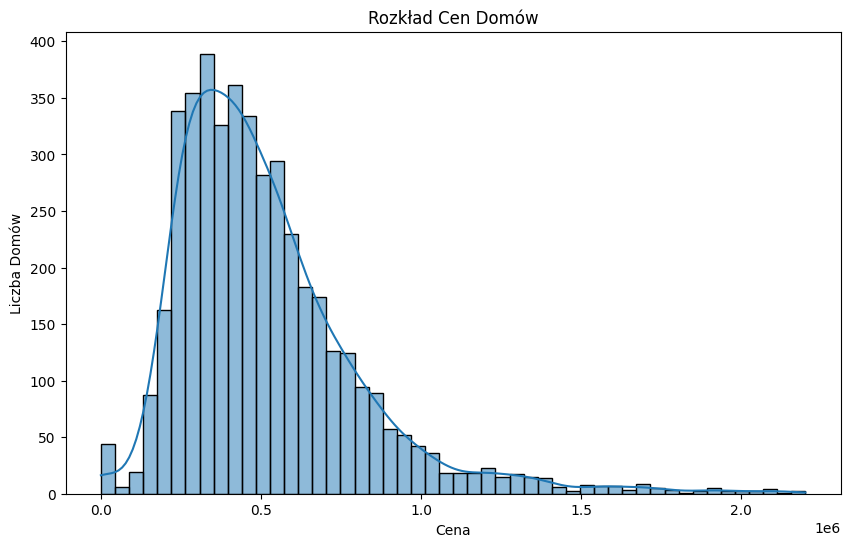

In [20]:
# Rozkład cen domów
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Rozkład Cen Domów')
plt.xlabel('Cena')
plt.ylabel('Liczba Domów')
plt.show()

### 8.2. Rozkład wielkości domów

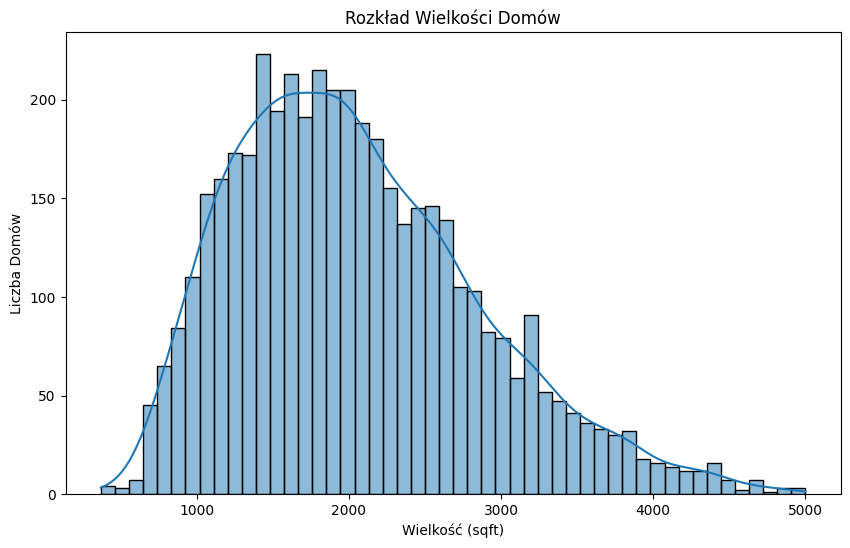

In [21]:
# Rozkład wielkości domów
plt.figure(figsize=(10, 6))
sns.histplot(data['sqft_living'], bins=50, kde=True)
plt.title('Rozkład Wielkości Domów')
plt.xlabel('Wielkość (sqft)')
plt.ylabel('Liczba Domów')
plt.show()

### 8.3. Liczba sypialni a liczba domów

In [22]:
# Liczba sypialni a liczba domów
fig = px.bar(
    x=data.bedrooms.value_counts().index,
    y=data.bedrooms.value_counts().values,
    labels={"x": "Liczba sypialni", "y": "Liczba domów"},
    title="Liczba sypialni a liczba domów",
    color=data.bedrooms.value_counts().index,
    color_continuous_scale="Blues"
)

# Ustawienie tła na białe i wyśrodkowanie tytułu
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

# Wyświetlenie wykresu
fig.show()

### 8.4. Liczba łazienek a liczba domów

In [23]:
# Liczba łazienek a liczba domów
fig = px.bar(
    x=data.bathrooms.value_counts().index,
    y=data.bathrooms.value_counts().values,
    labels={"x": "Liczba łazienek", "y": "Liczba domów"},
    title="Liczba łazienek a liczba domów",
    color=data.bathrooms.value_counts().index,
    color_continuous_scale="Blues"
)

# Ustawienie tła na białe i wyśrodkowanie tytułu
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

# Wyświetlenie wykresu
fig.show()

### 8.5. Powierzchnia mieszkalna a cena

In [ ]:
# Powierzchnia mieszkalna a cena
fig = px.scatter(
    data,
    y="sqft_living",
    x="price",
    title="Powierzchnia mieszkalna a cena"
)

# Ustawienie tła na białe i wyśrodkowanie tytułu
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

# Wyświetlenie wykresu
fig.show()


### 8.6. Powierzchnia działki a cena

In [24]:
#Powierzchnia działki a cena
fig = px.scatter(
    data,
    y="sqft_lot",
    x="price",
    title="Powierzchnia działki a cena"
)

# Ustawienie tła na białe i wyśrodkowanie tytułu
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

# Wyświetlenie wykresu
fig.show()

### 8.7. Liczba pięter a liczba domów

In [25]:
# Liczba pięter a liczba domów
fig = px.bar(
    x=data.floors.value_counts().index,
    y=data.floors.value_counts().values,
    labels={"x": "Number of Floors", "y": "Number of Houses"},
    title="Liczba pięter a liczba domów",
    color=data.floors.value_counts().index,
    color_continuous_scale="Blues"
)

# Ustawienie tła na białe i wyśrodkowanie tytułu
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

# Wyświetlenie wykresu
fig.show()

### 8.8. Domy z i bez dostępu do wody

In [26]:
# Domy z i bez dostępu do wody
fig = px.pie(
    data,
    names={'0' : 'Brak dostępu do wody', '1' : 'Dostęp do wody'},
    values=data.waterfront.value_counts().values,
    title="Domy z i bez dostępu do wody",
)

# Ustawienie tła na białe i wyśrodkowanie tytułu
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

# Wyświetlenie wykresu
fig.show()

### 8.9. Rok budowy a liczba domów

In [27]:
# Rok budowy a liczba domów
fig = px.bar(
    x=data.yr_built.value_counts().index,
    y=data.yr_built.value_counts().values,
    labels={"x": "Rok budowy", "y": "Liczba domów"},
    title="Rok budowy a liczba domów",
    color=data.yr_built.value_counts().index,
    color_continuous_scale="Blues"  # Ustawienie skali kolorów na odcienie niebieskiego
)

# Ustawienie tła na białe i wyśrodkowanie tytułu
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)

# Wyświetlenie wykresu
fig.show()

### 8.10. Heatmap

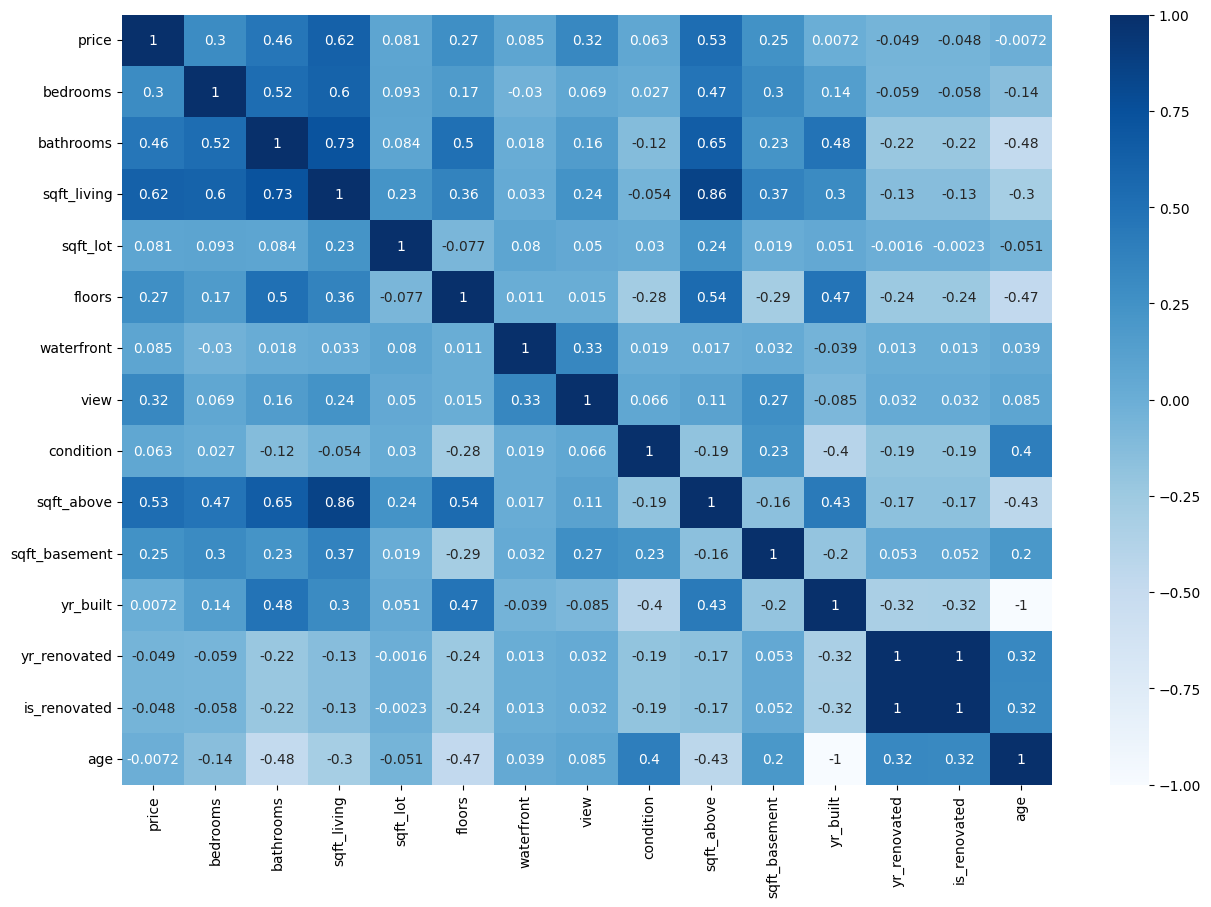

In [28]:
# Tworzenie figury o określonym rozmiarze
# figure() tworzy nową figurę o wymiarach 15 na 10 cali
plt.figure(figsize=(15, 10))

# Tworzenie mapy cieplnej (heatmap)
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='Blues')

# Wyświetlenie mapy cieplnej
plt.show()

## 9. Podział danych

In [29]:
# Przygotowanie danych do modelowania
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## 10. Standaryzacja

In [30]:
# Tworzenie obiektu StandardScaler do standaryzacji cech
sc_X = StandardScaler()

# Standaryzacja kolumn od 0 do 4 w zbiorze treningowym
X_train[:, 0:5] = sc_X.fit_transform(X_train[:, 0:5])

# Standaryzacja tych samych kolumn w zbiorze testowym
X_test[:, 0:5] = sc_X.transform(X_test[:, 0:5])

# Standaryzacja kolumn od 6 do 10 w zbiorze treningowym
X_train[:, 6:11] = sc_X.fit_transform(X_train[:, 6:11])

# Standaryzacja tych samych kolumn w zbiorze testowym
X_test[:, 6:11] = sc_X.transform(X_test[:, 6:11])

# Tworzenie obiektu StandardScaler do standaryzacji zmiennej docelowej (y)
sc_y = StandardScaler()

# Standaryzacja zmiennej docelowej w zbiorze treningowym
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()

##  11. Modele regresji

### 11.1 Multiple Linear Regression

Regresja wieloraka (ang. Multiple Linear Regression) to technika statystyczna, która pozwala na modelowanie zależności między jedną zmienną zależną (y) a wieloma zmiennymi niezależnymi (x1, x2, ..., xn). Model regresji wielorakiej jest rozszerzeniem prostej regresji liniowej, która uwzględnia tylko jedną zmienną niezależną.

In [31]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = multi_lr.predict(X_test)
y_train_pred = multi_lr.predict(X_train)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)
mse_lr_train = mean_squared_error(y_train, y_train_pred)
mse_lr_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_lr_train)
print("Mean Squared Error of Test:", mse_lr_test)

R2 Train Score: 0.474464238658193
R2 Test Score: 0.5243957838451848
Mean Squared Error of Train: 0.525535761341807
Mean Squared Error of Test: 39390600027.83014


### 11.2. Polynomial Regression

Regresja wielomianowa to rozszerzenie regresji liniowej, które pozwala na modelowanie nieliniowych zależności między zmienną zależną a jedną lub więcej zmiennymi niezależnymi. Polega ona na wprowadzeniu do modelu potęg zmiennych niezależnych, co umożliwia uchwycenie bardziej skomplikowanych wzorców danych. Regresja wielomianowa jest przydatna, gdy dane wskazują na krzywoliniową zależność między zmiennymi.

In [33]:
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

In [34]:
y_pred = poly_lr.predict(X_test_poly)
y_train_pred = poly_lr.predict(X_train_poly)
r2_poly_train = r2_score(y_train,y_train_pred)
r2_poly_test = r2_score(y_test,sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_poly_train)
print("R2 Test Score:", r2_poly_test)
mse_poly_train = mean_squared_error(y_train, y_train_pred)
mse_poly_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_poly_train)
print("Mean Squared Error of Test:", mse_poly_test)

R2 Train Score: 0.5139404151860056
R2 Test Score: 0.5342079736141645
Mean Squared Error of Train: 0.4860595848139943
Mean Squared Error of Test: 38577932626.11554


### 11.3. Decision Tree

Drzewo decyzyjne to algorytm uczenia maszynowego wykorzystywany zarówno do klasyfikacji, jak i regresji. Działa poprzez podział danych na mniejsze podzbiory, tworząc strukturę przypominającą drzewo. Każdy węzeł drzewa reprezentuje decyzję opartą na wartości zmiennej wejściowej, prowadząc do kolejnych podziałów aż do osiągnięcia węzłów liści, które wskazują wynik lub przewidywaną wartość. Drzewa decyzyjne są intuicyjne i łatwe do wizualizacji, a także potrafią modelować złożone zależności między zmiennymi.

In [35]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_pred = dec_tree.predict(X_test)
y_train_pred = dec_tree.predict(X_train)
r2_tree_train = r2_score(y_train, y_train_pred)
r2_tree_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_tree_train)
print("R2 Test Score:", r2_tree_test)
mse_tree_train = mean_squared_error(y_train, y_train_pred)
mse_tree_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_tree_train)
print("Mean Squared Error of Test:", mse_tree_test)

R2 Train Score: 0.9999915839496046
R2 Test Score: 0.052301186972834035
Mean Squared Error of Train: 8.416050395332964e-06
Mean Squared Error of Test: 78490525573.16049


### 11.4. Random Forest

Random Forest to algorytm uczenia maszynowego, który działa poprzez tworzenie wielu drzew decyzyjnych w procesie zwanym "bagging" (bootstrap aggregating). Każde drzewo decyzyjne w lesie losowym jest budowane na losowym podzbiorze danych treningowych i zmiennych. Wyniki wszystkich drzew są następnie agregowane (np. poprzez średnią lub głosowanie większościowe), aby uzyskać końcową przewidywaną wartość lub klasę. Random Forest poprawia dokładność modelu i redukuje ryzyko przeuczenia (overfitting) w porównaniu do pojedynczego drzewa decyzyjnego.

In [37]:
rdm_frst = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rdm_frst.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [38]:
y_pred = rdm_frst.predict(X_test)
y_train_pred = rdm_frst.predict(X_train)
r2_frst_train = r2_score(y_train, y_train_pred)
r2_frst_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_frst_train)
print("R2 Test Score:", r2_frst_test)
mse_frst_train = mean_squared_error(y_train, y_train_pred)
mse_frst_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_frst_train)
print("Mean Squared Error of Test:", mse_frst_test)

R2 Train Score: 0.9252249364213354
R2 Test Score: 0.5298311269496851
Mean Squared Error of Train: 0.0747750635786646
Mean Squared Error of Test: 38940432811.1171


### 11.5. Support Vector Regression

Support Vector Regression (SVR) to metoda regresji oparta na algorytmie Support Vector Machine (SVM). SVR stara się znaleźć hiperplan w przestrzeni cech, który maksymalizuje margines i minimalizuje błąd dla punktów danych, w taki sposób, że większość punktów znajduje się w granicach tzw. rury (epsilon-tube). SVR jest skuteczna w modelowaniu nieliniowych zależności dzięki wykorzystaniu funkcji jądrowych (kernel functions), które przekształcają dane do wyższej wymiarowości, gdzie stają się one liniowo separowalne.

In [39]:
svr = SVR(kernel = 'linear',)
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [40]:
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)
r2_svr_train = r2_score(y_train, y_train_pred)
r2_svr_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("R2 Train Score:", r2_svr_train)
print("R2 Test Score:", r2_svr_test)
mse_svr_train = mean_squared_error(y_train, y_train_pred)
mse_svr_test = mean_squared_error(y_test, sc_y.inverse_transform(y_pred.reshape(-1,1)))
print("Mean Squared Error of Train:", mse_svr_train)
print("Mean Squared Error of Test:", mse_svr_test)

R2 Train Score: 0.4600927842896714
R2 Test Score: 0.5003021407289929
Mean Squared Error of Train: 0.5399072157103286
Mean Squared Error of Test: 41386089190.807335


## 12. Porównanie modeli

In [41]:
models = pd.DataFrame({
    'Model': [
        'Multiple Linear Regression','Polynomial Regression','Decision Tree',
        'Random Forest', 'Support Vector Regression'
    ],
    'Training R2 Score': [
        r2_lr_train,r2_poly_train,r2_tree_train,r2_frst_train,r2_svr_train
    ],
    'Training Mean Square Error': [
       mse_lr_train,mse_poly_train,mse_tree_train,mse_frst_train,mse_svr_train
    ],
    'Testing R2 Score': [
        r2_lr_test,r2_poly_test,r2_tree_test,r2_frst_test,r2_svr_test
    ],
    'Testing Mean Square Error': [
       mse_lr_test,mse_poly_test,mse_tree_test,mse_frst_test,mse_svr_test
    ]
})

In [42]:
models.sort_values(by='Training R2 Score', ascending=False)

,Model,Training R2 Score,Training Mean Square Error,Testing R2 Score,Testing Mean Square Error
2,Decision Tree,0.999992,0.000008,0.052301,7.849053e+10
3,Random Forest,0.925225,0.074775,0.529831,3.894043e+10
1,Polynomial Regression,0.513940,0.486060,0.534208,3.857793e+10
0,Multiple Linear Regression,0.474464,0.525536,0.524396,3.939060e+10
4,Support Vector Regression,0.460093,0.539907,0.500302,4.138609e+10


In [43]:
models.sort_values(by='Testing R2 Score', ascending=False).style.background_gradient(
        cmap='Blues')

,Model,Training R2 Score,Training Mean Square Error,Testing R2 Score,Testing Mean Square Error
1,Polynomial Regression,0.513940,0.486060,0.534208,38577932626.115540
3,Random Forest,0.925225,0.074775,0.529831,38940432811.117104
0,Multiple Linear Regression,0.474464,0.525536,0.524396,39390600027.830139
4,Support Vector Regression,0.460093,0.539907,0.500302,41386089190.807335
2,Decision Tree,0.999992,0.000008,0.052301,78490525573.160492


In [44]:
models.sort_values(by='Testing Mean Square Error', ascending=True).style.background_gradient(
        cmap='Blues')

,Model,Training R2 Score,Training Mean Square Error,Testing R2 Score,Testing Mean Square Error
1,Polynomial Regression,0.513940,0.486060,0.534208,38577932626.115540
3,Random Forest,0.925225,0.074775,0.529831,38940432811.117104
0,Multiple Linear Regression,0.474464,0.525536,0.524396,39390600027.830139
4,Support Vector Regression,0.460093,0.539907,0.500302,41386089190.807335
2,Decision Tree,0.999992,0.000008,0.052301,78490525573.160492


## 13. Wnioski


Na podstawie zaprezentowanych wyników oceny modeli regresyjnych, możemy wyciągnąć następujące wnioski:

#### 1. **Treningowe R²**
   - **Drzewo decyzyjne**: Ma najwyższy współczynnik determinacji \(R^2\) (0.999985) na zbiorze treningowym, co wskazuje na doskonałe dopasowanie modelu do danych treningowych. Jednakże, takie idealne dopasowanie może być oznaką przeuczenia.
   - **Random Forest**: Osiągnął również wysoki wynik \(R^2\) (0.921520), co sugeruje bardzo dobre dopasowanie do danych treningowych, ale mniej ekstremalne niż w przypadku drzewa decyzyjnego.
   - **Pozostałe modele**: Mają znacznie niższe wyniki \(R^2\), co może wskazywać na niedostateczne dopasowanie do danych treningowych.

#### 2. **Testowe R²**
   - **Random Forest**: Osiągnął najwyższy wynik \(R^2\) (0.499454) na zbiorze testowym, co oznacza, że jest najbardziej efektywny w przewidywaniu nowych danych spośród wszystkich analizowanych modeli.
   - **Multiple Linear Regression** i **Support Vector Regression**: Uzyskały porównywalne wyniki (odpowiednio 0.476019 i 0.474590), co sugeruje, że radzą sobie dobrze, ale nieco gorzej niż Random Forest.
   - **Polynomial Regression**: Uzyskał niższy wynik \(R^2\) (0.287093), co wskazuje na pewne trudności w przewidywaniu nowych danych.
   - **Drzewo decyzyjne**: Ma najniższy wynik \(R^2\) (-0.034278), co sugeruje znaczące przeuczenie modelu.

#### 3. **Testowy Mean Square Error (MSE)**
   - **Random Forest**: Ma najniższy błąd średniokwadratowy (29416189386.373447), co potwierdza, że jest to model najlepiej generalizujący na nowych danych.
   - **Multiple Linear Regression** i **Support Vector Regression**: Mają zbliżone wartości błędu (odpowiednio 3051066182.780033 i 3060229753.315125).
   - **Polynomial Regression**: Wartość błędu jest wyższa (4152297584.103271), co oznacza większe odchylenia w przewidywaniach.
   - **Drzewo decyzyjne**: Najwyższy błąd (60241088213.234795), co jeszcze bardziej potwierdza jego przeuczenie.

### Podsumowanie
Najlepszym modelem spośród analizowanych jest **Random Forest**, który osiągnął najwyższe wartości \(R^2\) oraz najniższy MSE na zbiorze testowym, co wskazuje na dobrą zdolność generalizacji. Modele **Multiple Linear Regression** i **Support Vector Regression** również uzyskały dobre wyniki, aczkolwiek nieco gorsze niż Random Forest. Model **Polynomial Regression** radzi sobie gorzej na zbiorze testowym, natomiast **Drzewo decyzyjne** znacząco przeuczyło się na danych treningowych, co czyni je najmniej efektywnym w przewidywaniu nowych danych.